In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import os
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D
 #for explainable
from skimage.segmentation import mark_boundaries

In [ ]:
data_path = '/content/drive/MyDrive/Deep Learning/Database/34/combined'
train_path = '/content/drive/MyDrive/Deep Learning/Database/34/combined/train'
test_path = '/content/drive/MyDrive/Deep Learning/Database/34/combined/test'
os.listdir(train_path)

['n', 'c']

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 20,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 20,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 4197 images belonging to 2 classes.
Found 1931 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = "relu", input_shape = (224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D( 32, (3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 64,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 128,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 256,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.15))

model.add(Dense(2, activation = "softmax"))


model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        1

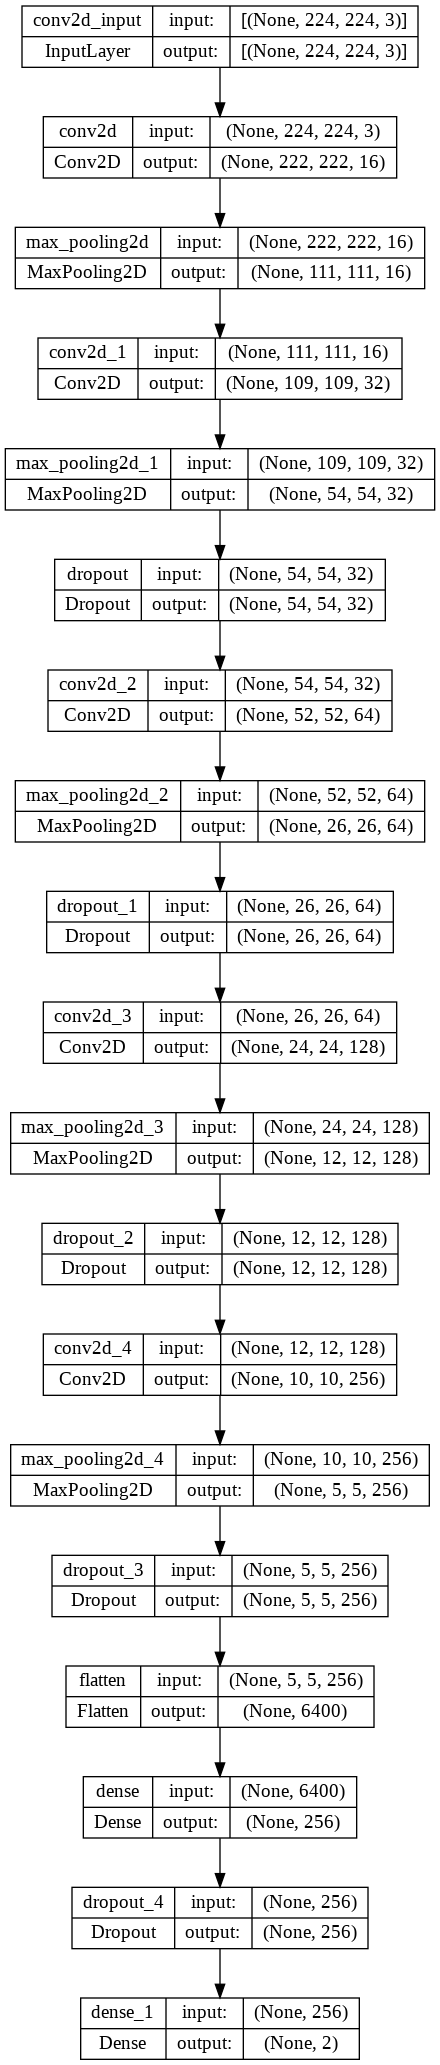

In [ ]:
#plot model layer
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
history = model.fit(training_set,
                    batch_size=32,
                    epochs = 40,
                    validation_data=test_set)

Epoch 1/40
210/210 [==============================] - 478s 2s/step - loss: 0.2555 - accuracy: 0.8985 - val_loss: 0.2275 - val_accuracy: 0.9363
Epoch 2/40
210/210 [==============================] - 364s 2s/step - loss: 0.1934 - accuracy: 0.9290 - val_loss: 0.1307 - val_accuracy: 0.9581
Epoch 3/40
210/210 [==============================] - 365s 2s/step - loss: 0.1702 - accuracy: 0.9390 - val_loss: 0.1435 - val_accuracy: 0.9415
Epoch 4/40
210/210 [==============================] - 366s 2s/step - loss: 0.1325 - accuracy: 0.9550 - val_loss: 0.0979 - val_accuracy: 0.9700
Epoch 5/40
210/210 [==============================] - 364s 2s/step - loss: 0.1333 - accuracy: 0.9507 - val_loss: 0.0933 - val_accuracy: 0.9751
Epoch 6/40
210/210 [==============================] - 358s 2s/step - loss: 0.1075 - accuracy: 0.9638 - val_loss: 0.0864 - val_accuracy: 0.9798
Epoch 7/40
210/210 [==============================] - 357s 2s/step - loss: 0.0995 - accuracy: 0.9685 - val_loss: 0.1771 - val_accuracy: 0.9394

In [ ]:
model.save('covid_model.h5')

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9897545576095581
validation_accuracy 0.9813567996025085


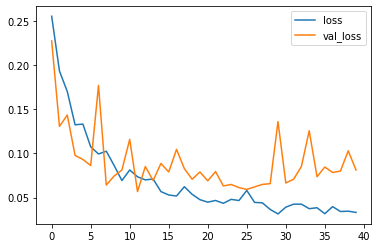

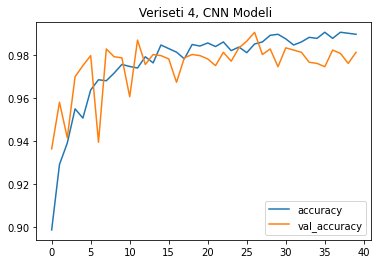

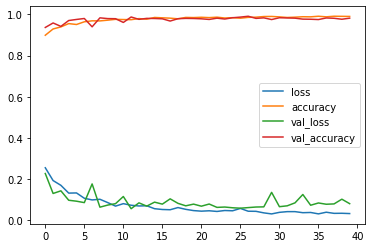

In [ ]:
losses = pd.DataFrame(history.history)
losses.head()
losses[['loss','val_loss']].plot() 
losses[['accuracy','val_accuracy']].plot() 
plt.title(" Veriseti 4, CNN Modeli")
losses.plot()

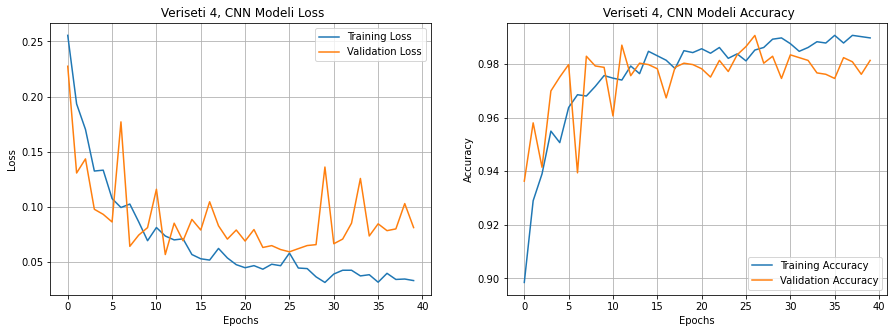

In [ ]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.title(" Veriseti 4, CNN Modeli Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.title(" Veriseti 4, CNN Modeli Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.show()

97/97 [==============================] - 51s 522ms/step


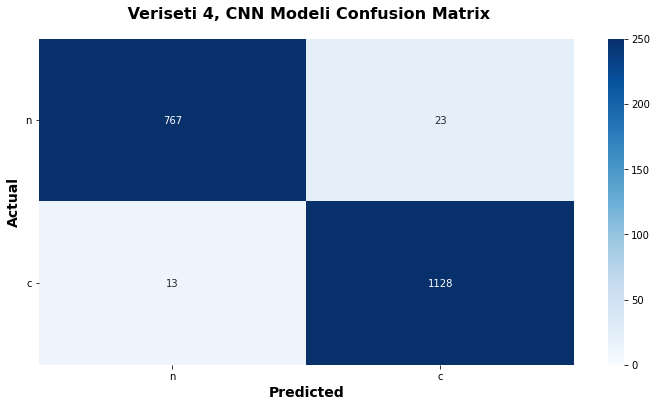

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef

classes = ["n", "c"]

y_pred = model.predict(test_set)
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_set.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))

ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title(' Veriseti 4, CNN Modeli Confusion Matrix',fontsize = 16,weight = 'bold',pad=20);

In [ ]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       790
           1       0.98      0.99      0.98      1141

    accuracy                           0.98      1931
   macro avg       0.98      0.98      0.98      1931
weighted avg       0.98      0.98      0.98      1931



In [ ]:
print("4. Veriseti - CNN Modeli")
print('Precision: %.3f' % precision_score(y_true, predictions))
print('Recall: %.3f' % recall_score(y_true, predictions))
print('Accuracy: %.3f' % accuracy_score(y_true, predictions))
print('F1 Score: %.3f' % f1_score(y_true, predictions))
print('Positive Predictive Value (PPV) Score: %.3f' % precision_score(y_true, predictions))
print('Matthews correlation coefficient (MCC) Score: %.3f' % matthews_corrcoef(y_true, predictions))

4. Veriseti - CNN Modeli
Precision: 0.980
Recall: 0.989
Accuracy: 0.981
F1 Score: 0.984
Positive Predictive Value (PPV) Score: 0.980
Matthews correlation coefficient (MCC) Score: 0.961


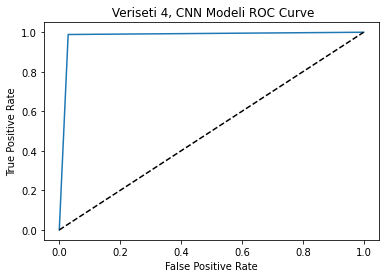

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_true, predictions)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], "k--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(" Veriseti 4, CNN Modeli ROC Curve")
plt.show()